<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS34cr8XRwTzJxEwEn1VoSK_CxSeu4xJnqWPCIpIUYQMNTuSQU0ZeL_Q0vjRCs&usqp=CAc" width="100" height="500" style="vertical-align:top">

# <center><font size=6> The Direct Line</font> <br /><font size=5> To Reducing Criminal Activity</font></center>
<center><font size=3><i>By Marisol Hernandez</i></font></center>  
<center><font size=3><i>10/11/2020</i></font></center>

---

## Table of Contents

[I. Objective](#objective)  
[II. Data Exploration](#data-exploration)  
[III. One Column Selection](#one-column-selection)  
[IV. Sort](#sort)  
[V. Series](#series)  
[VI. Plot](#plot)  
[VII. Summary](#summary)  
[VIII. Recommendations](#recommendations)

## Objective  <a id='objective'></a>
---
Crime rates can vary greatly across different times and locations. In some populations and in some periods, the crime rate is much greater than in other populations and at other time periods. It is essentially important to account for these trends so that law enforcement agencies may be in a position to enact resource allocations that may reduce the volume of crimes committed in any given location.

The objective of my investigation is to identify the cities that exhibit the highest crime and homicide (per capita) growth from 2012 to 2015 within the Western Region of the United States. In doing so, I conducted my research so that it answered the following questions:

**Questions of Investigation:**  
**1. What are the top 10 cities with the highest crimes per capita from 2012 and 2015? How do they compare?**  
**2. What are the top 5 cities that exhibited the highest crimes per capita growth?**  
**3. What are the top 5 cities that exhibited the highest homicides per capita growth?** 

I hope that the executive officers of these cities can use these findings to allocate their resources so they can respond efficiently. Additionally, these findings may help them identify the need for targeted and innovative solutions that would help restore the safety and security of their cities.

*Note: The Western Region is composed of the following states: Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming*.

## Data Exploration  <a id='data-exploration'></a>
---



### Cocktail
Before beginning my exploratory data analysis, I imported the required libraries. Additionally, I set some pandas options, as well as the back end of matplotlib.

In [2]:
# Preparation for pandas and NumPy
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

# Preparation for matplotlib
%matplotlib inline 

### Read in the Data
The next step to my EDA was to read in the CSV file, using `pd.read_csv()`, and print the first five rows, using `DataFrame.head(n=5)`. This gives us a glimpse of the dataframe we are working with.

In [5]:
# Read csv file and print first 5 rows
report = pd.read_csv("report.csv")
report.head(5)

   report_year agency_code agency_jurisdiction  population  violent_crimes  \
0         1975     NM00101     Albuquerque, NM    286238.0          2383.0   
1         1975     TX22001       Arlington, TX    112478.0           278.0   
2         1975     GAAPD00         Atlanta, GA    490584.0          8033.0   
3         1975     CO00101          Aurora, CO    116656.0           611.0   
4         1975     TX22701          Austin, TX    300400.0          1215.0   

   homicides  rapes  assaults  robberies  months_reported  crimes_percapita  \
0       30.0  181.0    1353.0      819.0             12.0            832.52   
1        5.0   28.0     132.0      113.0             12.0            247.16   
2      185.0  443.0    3518.0     3887.0             12.0           1637.44   
3        7.0   44.0     389.0      171.0             12.0            523.76   
4       33.0  190.0     463.0      529.0             12.0            404.46   

   homicides_percapita  rapes_percapita  assaults_percap

While `DataFrame.head(n=5)` delivers the first 5 rows, I was still interested in the dimensions of the dataframe. To retrieve the dimensions, I utilized the `DataFrame.shape` method. I now know that I am working with a **2,829 by 15** dataframe.

In [3]:
# Retrieve the dimensions
print("There are " + str(report.shape[0]) + " rows and " + str(report.shape[1]) + " columns in this table.")

There are 2829 rows and 15 columns in this table.


Additionally, I used the `DataFrame.columns` method to retrieve the column names. Here, I can see all the attributes I am working with. For the purpose of my investigation, I will subset my dataframe, i.e. remove some columns, but I will conduct that in a later step.

In [6]:
# Column names
report.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

Because most of my variables are numeric, I was interested in generating a statistical summary of those variables. Using the `DataFrame.describe()` method, I can see summary statistics of my dataframe. Immediately, I notice that the data collected dates from 1975 to 2015. For the purpose of my investigation, I will subset my data frame with data from my targeted time frame, but I will do so in the following subsection.

In [7]:
report.describe()

       report_year    population  violent_crimes     homicides        rapes  \
count  2829.000000  2.760000e+03    2.794000e+03   2795.000000  2754.000000   
mean   1995.000000  7.956981e+05    2.963255e+04    398.385331   416.278867   
std      11.834251  1.012451e+06    1.728630e+05   2281.276402   479.811934   
min    1975.000000  1.007630e+05    1.540000e+02      1.000000    15.000000   
25%    1985.000000  3.779310e+05    3.014750e+03     32.000000   176.250000   
50%    1995.000000  5.366145e+05    5.135500e+03     64.000000   291.000000   
75%    2005.000000  8.168558e+05    9.058500e+03    131.000000   465.000000   
max    2015.000000  8.550861e+06    1.932274e+06  24703.000000  3899.000000   

           assaults      robberies  months_reported  crimes_percapita  \
count   2753.000000    2754.000000      2692.000000       2794.000000   
mean    4405.146023    4000.245098        11.868871       1093.049810   
std     6977.293769    8653.902965         1.118194        676.884678

### Subset the Data
Because I am only interested in analyzing the crimes and homicides (per capita) of cities within the Western Region from 2012 to 2015, I had to subset the dataframe accordingly. The first line of code subsets the dataframe so that it only contains data for the states that make up the Western Region. The second line of code subsets the dataframe again so that it only contains data pertaining to the crimes and homicides (per capita) committed between 2012 and 2015. The last line of code prints the first 5 lines of our subsetted dataframe, `subset`.

In [11]:
subset = report[report["agency_jurisdiction"].str.contains("AL|AZ|CA|CO|HI|ID|MT|NV|NM|OR|UT|WA|WY")]
subset = subset.loc[(subset.report_year >= 2012) & (subset.report_year <= 2015),["report_year","agency_jurisdiction", 
        "crimes_percapita", "homicides_percapita"]]
subset.head(5)

      report_year agency_jurisdiction  crimes_percapita  homicides_percapita
2553         2012     Albuquerque, NM            749.71                 7.40
2556         2012          Aurora, CO            415.49                 5.05
2568         2012          Denver, CO            618.09                 6.20
2573         2012          Fresno, CA            543.07                10.08
2574         2012        Honolulu, HI            239.37                 1.13

I decide to look at crimes and homicides (per capita) growth of cities within the Western Region from 2012 to 2015. Using a `for` loop, I subsetted the `crime_report` dataframe based on the `report_year` specified within the loop. The second and third command within the loop adds `i`, as a string, to the `crimes_percapita` and `homicides_percapita` column names to specify the year the data was collected. 

The third command within the loop drops the `report_year` column, as it no longer has much relevance to my investigation. Lastly, the forth command adds the subset to a list called `dataframes` that will be used to merge all four subsets in the next step.

In [12]:
dataframes = list()

for i in range(2012,2016):
    df = subset.loc[subset.report_year == i,:]
    df.rename(columns={"crimes_percapita":"crimes_percapita" + str(i)}, inplace = True)
    df.rename(columns={"homicides_percapita":"homicides_percapita" + str(i)}, inplace = True)
    df = df.drop("report_year",1)
    
    dataframes.append(df)

<ipython-input-12-ebffa336ceb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"crimes_percapita":"crimes_percapita" + str(i)}, inplace = True)
<ipython-input-12-ebffa336ceb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"homicides_percapita":"homicides_percapita" + str(i)}, inplace = True)
<ipython-input-12-ebffa336ceb6>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("report_year",1)
<ipython-input-12-ebffa336ceb6>:5: SettingWithCopyWarning: 
A value is trying to be set on 

I assigned the first subset within `dataframes` to the variable `west_report`. Using another `for` loop, I merged the remaining subsets to the first subset by `agency_jurisdiction`. This creates a general dataframe that contains the crimes and homicides (per capita) for every Western city between the years 2012 and 2015. Notice that I reset the index to `agency_jurisdiction` for organizational purposes. Using `DataFrame.head(n=5)`, we can see that `west_report` is just as we expected.

In [13]:
west_report = dataframes[0]

for i in range(1,(len(dataframes))):
    west_report = pd.merge(west_report, dataframes[i], how = "inner", on = "agency_jurisdiction")
    
west_report = west_report.set_index(['agency_jurisdiction'])
west_report.head(5)

                     crimes_percapita2012  homicides_percapita2012  \
agency_jurisdiction                                                  
Albuquerque, NM                    749.71                     7.40   
Aurora, CO                         415.49                     5.05   
Denver, CO                         618.09                     6.20   
Fresno, CA                         543.07                    10.08   
Honolulu, HI                       239.37                     1.13   

                     crimes_percapita2013  homicides_percapita2013  \
agency_jurisdiction                                                  
Albuquerque, NM                    774.86                     6.63   
Aurora, CO                         416.03                     5.82   
Denver, CO                         630.68                     6.32   
Fresno, CA                         501.50                     7.86   
Honolulu, HI                       231.14                     1.83   

                  

Just out of curiosity, I wanted to see how much data I was working with now. Following the same steps to retrieve the dimensions, I can now see that I am looking at the crimes (per capita) records of **20 cities**.

In [15]:
# Retrieve the dimensions
print("There are " + str(west_report.shape[0]) + " rows and " + str(west_report.shape[1]) + " columns in this table.")

There are 20 rows and 8 columns in this table.


### Data Cleaning

Before moving on to conduct further analysis, it is essential that I check my `west_report` dataframe for any missing or null values. The following code retrieves the sum of missing values for each column. Here I can see that `crimes_percapita2015` and `homicides_percapita2015` contains one missing value.

In [16]:
west_report.iloc[:,:].isnull().sum()

crimes_percapita2012       0
homicides_percapita2012    0
crimes_percapita2013       0
homicides_percapita2013    0
crimes_percapita2014       0
homicides_percapita2014    0
crimes_percapita2015       1
homicides_percapita2015    1
dtype: int64

Using the `DataFrame.dropna()` method, I removed the one row containing missing values. Following the same code as above, I can verify that `west_report` no longer contains any missing values.

In [17]:
west_report = west_report.dropna()
west_report.iloc[:,:].isnull().sum()

crimes_percapita2012       0
homicides_percapita2012    0
crimes_percapita2013       0
homicides_percapita2013    0
crimes_percapita2014       0
homicides_percapita2014    0
crimes_percapita2015       0
homicides_percapita2015    0
dtype: int64

Additionally, we can check the dimensions to verify that the one row containing missing values was removed. Indeed, I can see that I am now working with data for **19 cities**.

In [18]:
# Retrieve the dimensions
print("There are " + str(west_report.shape[0]) + " rows and " + str(west_report.shape[1]) + " columns in this table.")

There are 19 rows and 8 columns in this table.


## One Column Selection  <a id='one-column-selection'></a>
---



I am interested in finding the top 10 cities with the *highest* crimes per capita from 2012. To do so, I sorted the `west_report` dataframe where the rows are in descending order based on the `crimes_percapita2012` column. 

Printing the first 10 rows delivers the cities with the *highest* crimes per capita from 2012.

In [19]:
west_report.sort_values("crimes_percapita2012", ascending=False).iloc[0:10,0]

agency_jurisdiction
Oakland, CA           1993.31
Las Vegas, NV          783.97
Albuquerque, NM        749.71
Sacramento, CA         738.63
Tucson, AZ             724.32
San Francisco, CA      704.20
Salt Lake City, UT     676.49
Phoenix, AZ            636.68
Denver, CO             618.09
Seattle, WA            603.32
Name: crimes_percapita2012, dtype: float64

Since my investigation is focused on analyzing the growth in crimes (per capita), I am interested in whether the 10 cities found above maintained these spots in 2015 as well. Following the same steps above but using the `crimes_percapita2015` column, we can see that while there is a little shuffling, the same cities are indeed listed.

In [21]:
west_report.sort_values("crimes_percapita2015", ascending=False).iloc[0:10,6]

agency_jurisdiction
Oakland, CA           1442.50
Albuquerque, NM        965.84
Las Vegas, NV          920.73
Salt Lake City, UT     855.24
San Francisco, CA      776.82
Sacramento, CA         737.36
Denver, CO             673.93
Tucson, AZ             655.50
Los Angeles, CA        634.82
Seattle, WA            598.65
Name: crimes_percapita2015, dtype: float64

## Sort  <a id='sort'></a>
---



Currently, the `west_report` dataframe consists of eight columns that document the crimes and homicides (per capita) that occured in Western cities for each year between 2012 and 2015. Part of my objective is to analyze the crime and homicide (per capita) growth between 2012 and 2015. To capture the growth, I created two more columns called `Crime_Percent_Change` and `Homicide_Percent_Change`.

In [22]:
west_report["Crime_Percent_Change"] = ((west_report["crimes_percapita2015"] - west_report["crimes_percapita2012"]) / 
west_report["crimes_percapita2012"])*100

west_report["Homicide_Percent_Change"] = ((west_report["homicides_percapita2015"] - 
west_report["homicides_percapita2012"]) / west_report["homicides_percapita2012"])*100

Additionally, I created another subset called `sort_by_crime` that contains data pertaining to the crime per capita where the rows are in descending order based the `Crime_Percent_Change` column.

In [24]:
sort_by_crime = west_report.iloc[:, [0,2,4,6,8]]
sort_by_crime = sort_by_crime.sort_values("Crime_Percent_Change", ascending = False)

Printing the first five rows delivers the cities with the *highest* crime per capita growth from 2012 to 2015.

In [25]:
sort_by_crime.head(5)

                     crimes_percapita2012  crimes_percapita2013  \
agency_jurisdiction                                               
Los Angeles, CA                    481.10                426.02   
Albuquerque, NM                    749.71                774.86   
Salt Lake City, UT                 676.49                781.62   
Las Vegas, NV                      783.97                758.04   
Aurora, CO                         415.49                416.03   

                     crimes_percapita2014  crimes_percapita2015  \
agency_jurisdiction                                               
Los Angeles, CA                    490.71                634.82   
Albuquerque, NM                    882.85                965.84   
Salt Lake City, UT                 754.80                855.24   
Las Vegas, NV                      841.07                920.73   
Aurora, CO                         407.47                460.81   

                     Crime_Percent_Change  
agency_jurisdict

## Series  <a id='series'></a>
---




Lets take a look at what the `west_report` data frame looks like now.

In [26]:
west_report.head(3)

                     crimes_percapita2012  homicides_percapita2012  \
agency_jurisdiction                                                  
Albuquerque, NM                    749.71                     7.40   
Aurora, CO                         415.49                     5.05   
Denver, CO                         618.09                     6.20   

                     crimes_percapita2013  homicides_percapita2013  \
agency_jurisdiction                                                  
Albuquerque, NM                    774.86                     6.63   
Aurora, CO                         416.03                     5.82   
Denver, CO                         630.68                     6.32   

                     crimes_percapita2014  homicides_percapita2014  \
agency_jurisdiction                                                  
Albuquerque, NM                    882.85                     5.37   
Aurora, CO                         407.47                     2.56   
Denver, CO        

Since I have already captured the crime per capita growth, I now want to capture the *homicide per capita* growth. To do so, I subsetted the `west_report` dataframe into another dataframe called `homicide_report` that contains data pertaining to the homicides per capita.

In [27]:
homicides_report = west_report.iloc[:, [1,3,5,7,9]]

Lets print the first 5 rows to verify.

In [29]:
homicides_report.head(5)

                     homicides_percapita2012  homicides_percapita2013  \
agency_jurisdiction                                                     
Albuquerque, NM                         7.40                     6.63   
Aurora, CO                              5.05                     5.82   
Denver, CO                              6.20                     6.32   
Fresno, CA                             10.08                     7.86   
Honolulu, HI                            1.13                     1.83   

                     homicides_percapita2014  homicides_percapita2015  \
agency_jurisdiction                                                     
Albuquerque, NM                         5.37                     7.68   
Aurora, CO                              2.56                     6.66   
Denver, CO                              4.66                     7.77   
Fresno, CA                              9.16                     7.49   
Honolulu, HI                            1.91      

Using the `DataFrame.describe()` method, I retrieved a statistical summary of each of the 5 columns. From here, I can see that the average homicides per capita portrayed a steady decrease from 2012 to 2014 but exhibited a sudden jump from 2014 to 2015. Additionally, the median of `Homicide_Percent_Change` is near 0, indicating that half of the cities saw a decrease in homicides from 2012 to 2015 while the other half saw an increase from 2012 to 2015.

In [31]:
homicides_report.describe()

       homicides_percapita2012  homicides_percapita2013  \
count                19.000000                19.000000   
mean                  7.338421                 6.598421   
std                   6.323101                 4.262017   
min                   1.130000                 1.830000   
25%                   4.385000                 4.325000   
50%                   6.810000                 6.460000   
75%                   7.830000                 7.175000   
max                  31.790000                22.280000   

       homicides_percapita2014  homicides_percapita2015  \
count                19.000000                19.000000   
mean                  5.796316                 6.705789   
std                   3.892496                 3.985697   
min                   1.910000                 1.500000   
25%                   3.405000                 3.785000   
50%                   5.290000                 7.120000   
75%                   6.650000                 7.725000

Similar to crimes per capita, I am interested in the cities with the *highest* homicides per capita growth from 2012 to 2015. To find these, I created another subset called `sort_by_homicide` where the rows are in descending order based the `Homicide_Percent_Change` column.

In [32]:
sort_by_homicide = homicides_report.sort_values("Homicide_Percent_Change", ascending = False)

Printing the first five rows delivers the cities with the *highest* homicide per capita growth from 2012 to 2015.

In [33]:
sort_by_homicide.head(5)

                        homicides_percapita2012  homicides_percapita2013  \
agency_jurisdiction                                                        
Las Vegas, NV                              5.14                     6.46   
Honolulu, HI                               1.13                     1.83   
Aurora, CO                                 5.05                     5.82   
Los Angeles County, CA                     6.98                     6.77   
Denver, CO                                 6.20                     6.32   

                        homicides_percapita2014  homicides_percapita2015  \
agency_jurisdiction                                                        
Las Vegas, NV                              7.97                     8.13   
Honolulu, HI                               1.91                     1.50   
Aurora, CO                                 2.56                     6.66   
Los Angeles County, CA                     6.39                     8.81   
Denver, CO 

## Plot  <a id='plot'></a>
---





Though I can observe the crime and homicide (per capita) growth from their corresponding columns, a ***grouped bar plot*** can deliver a better visualization. To plot the data, I created a function called `bar_plot()` that takes in two arguments — the first being a specified dataframe and the second being a specified attribute. Running the function will plot the 2012 and 2015 records for the first five cities listed in the dataframe.

In [34]:
def bar_plot(df, attribute):
    x = df.head(5)
    
    figure(num=None, figsize=(16, 7))
    
    bar1 = x.iloc[:,0]
    bar2 = x.iloc[:,3]
    
    label = [x.index[0], x.index[1], x.index[2], x.index[3], x.index[4]]
    
    pos1 = np.arange(len(bar1))
    pos2 = pos1 + 0.2
    
    plt.bar(pos1, bar1, width = 0.25, color = "skyblue", label = "2012")
    plt.bar(pos2, bar2, width = 0.25, color = "navy", label = "2015")
    
    plt.xticks(pos1, label)
    plt.xlabel("County")
    plt.ylabel(str(attribute) + " per Capita")
    plt.title("Top " + str(attribute) + " Jumps in Western Region" )
    plt.legend()
    plt.show()

The code below runs the `bar_plot()` function using the `sort_by_crime` dataframe and the crimes (per capita) attribute. Now we can visually see the cities that had the highest crime (per capita) growth from 2012 to 2015.

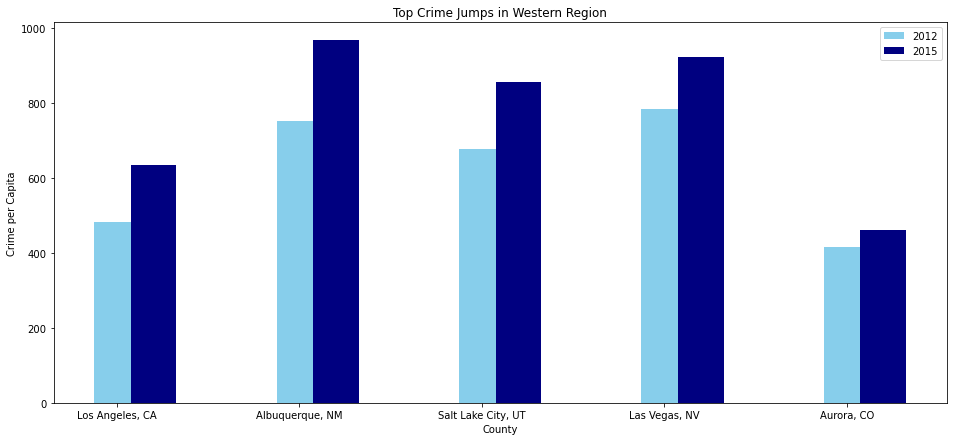

In [35]:
bar_plot(sort_by_crime, "Crime")

The code below runs the `bar_plot()` function using the `sort_by_homicide` dataframe and the homicides (per capita) attribute. Now we can visually see the the cities that had the highest homicide (per capita) growth from 2012 to 2015.

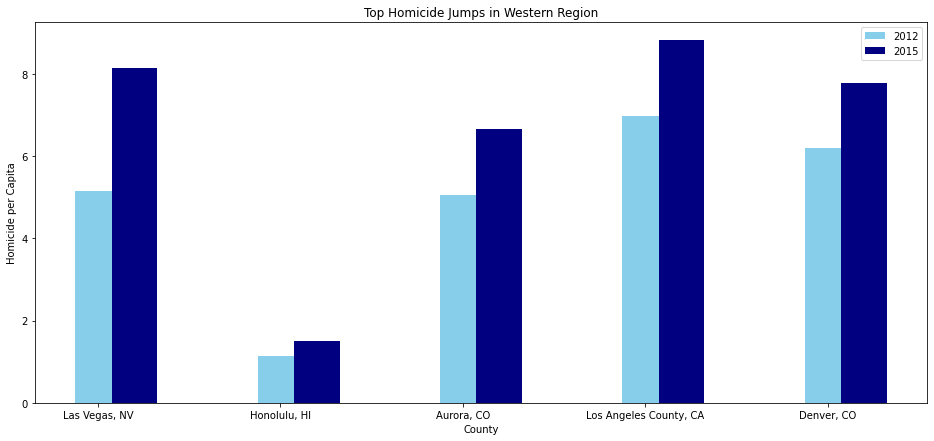

In [36]:
bar_plot(sort_by_homicide, "Homicide")

## Summary <a id='summary'></a>
---
In observing the growth in crime across different locations and times, I had to aggregate my data in such a manner that would allow me to do so. I decided to narrow my study so that I could identify the cities within the Western Region of the United States that exhibited the highest growth in <ins>crimes and homicides per capita</ins> from 2012 to 2015. In doing so I created a subsetted dataframe, `west_report`, that contains the yearly crime and homicide (per capita) report for every Western city between the years 2012 and 2015. Additionally, I created two more columns called that indicate the crime and homicide (per capita) growth between 2012 and 2015. Now, with this subset, I was able to answer all of my questions of investigation.

**What are the top 10 cities with the highest crimes per capita from 2012 and 2015? How do they compare?**  
To find the top 10 cities with the *highest crimes per capita* from 2012, I sorted the `west_report` dataframe where the rows are in descending order based on the `crimes_percapita2012` column. To find the top 10 cities with the *highest crimes per capita* from 2015, I followed the same steps but with the `crimes_percapita2015` column. Printing the first 10 rows of each, I learned while there is a little shuffling, the same 10 cities were found in both listings.

**What are the top 5 cities that exhibited the highest crimes per capita growth?**  
To capture the *crime per capita* growth, I created another subset from `west_report` called `sort_by_crime` that contains data pertaining to the crime per capita where the rows are in descending order based on *crime per capita* growth. Printing the first five rows, I can see that the top five cities that exhibited the highest *crime per capita* growth are *Los Angeles, CA, Alburqueque, NM, Salt Lake City, UT, Las Vegas, NV, and Aurora, CO,*

**What are the top 5 cities that exhibited the highest homicides per capita growth?**   
To capture the *homcide per capita* growth, I followed a similar procedure as above. I created another subset from `west_report` called `sort_by_homicide` that contains data pertaining to the crime per capita where the rows are in descending order based on *homicide per capita* growth. Printing the first five rows, I can see that the top five cities that exhibited the highest *homicide per capita* growth are *Las Vegas, NV, Honolulu, HI, Aurora, CO, Los Angeles County, CA, and Denver CO.*

## Recommendations <a id='recommendations'></a>
---

When deploying police enforcement, there are many factors law enforcement agencies must consider so that they can optimize the allocation of the available resources. For instance, it would be to the benefit of executive officers to know which cities exhibited the highest growth in crime between a specified period. Knowing this information allows officers to respond efficiently by identifying targeted and innovative solutions.

Based on my findings, I recommend that the executive officers of the cities that exhibited the highest crime growth (per capita) from 2012 to 2015 to take a second look at their resource budget and determine whether they can allocate more funding to targeted services that could reduce the number of crimes committed in their city. Additionally, they may want to focus on the conditions that drive people into criminal and unlawful behavior. This may require an examination of the systemic and societal conditions within these cities.

While the recommendations from above can be applied to any type of crime, reducing a specific type of crime may require a more targeted solution. Take the cities that exhibited the highest homicide growth (per capita) from 2012 to 2015 for instance. If the executive officers of these cities are looking to reduce homicides, they may want to explore the idea of programmes that target the population group that is most likely to commit this type of crime. Additionally, they may want to identify and diagnose the risk factors that drive this population into criminal activity. A treatment plan, complemented with the support of the family and community, could deliver significant results.